# Battleship Game
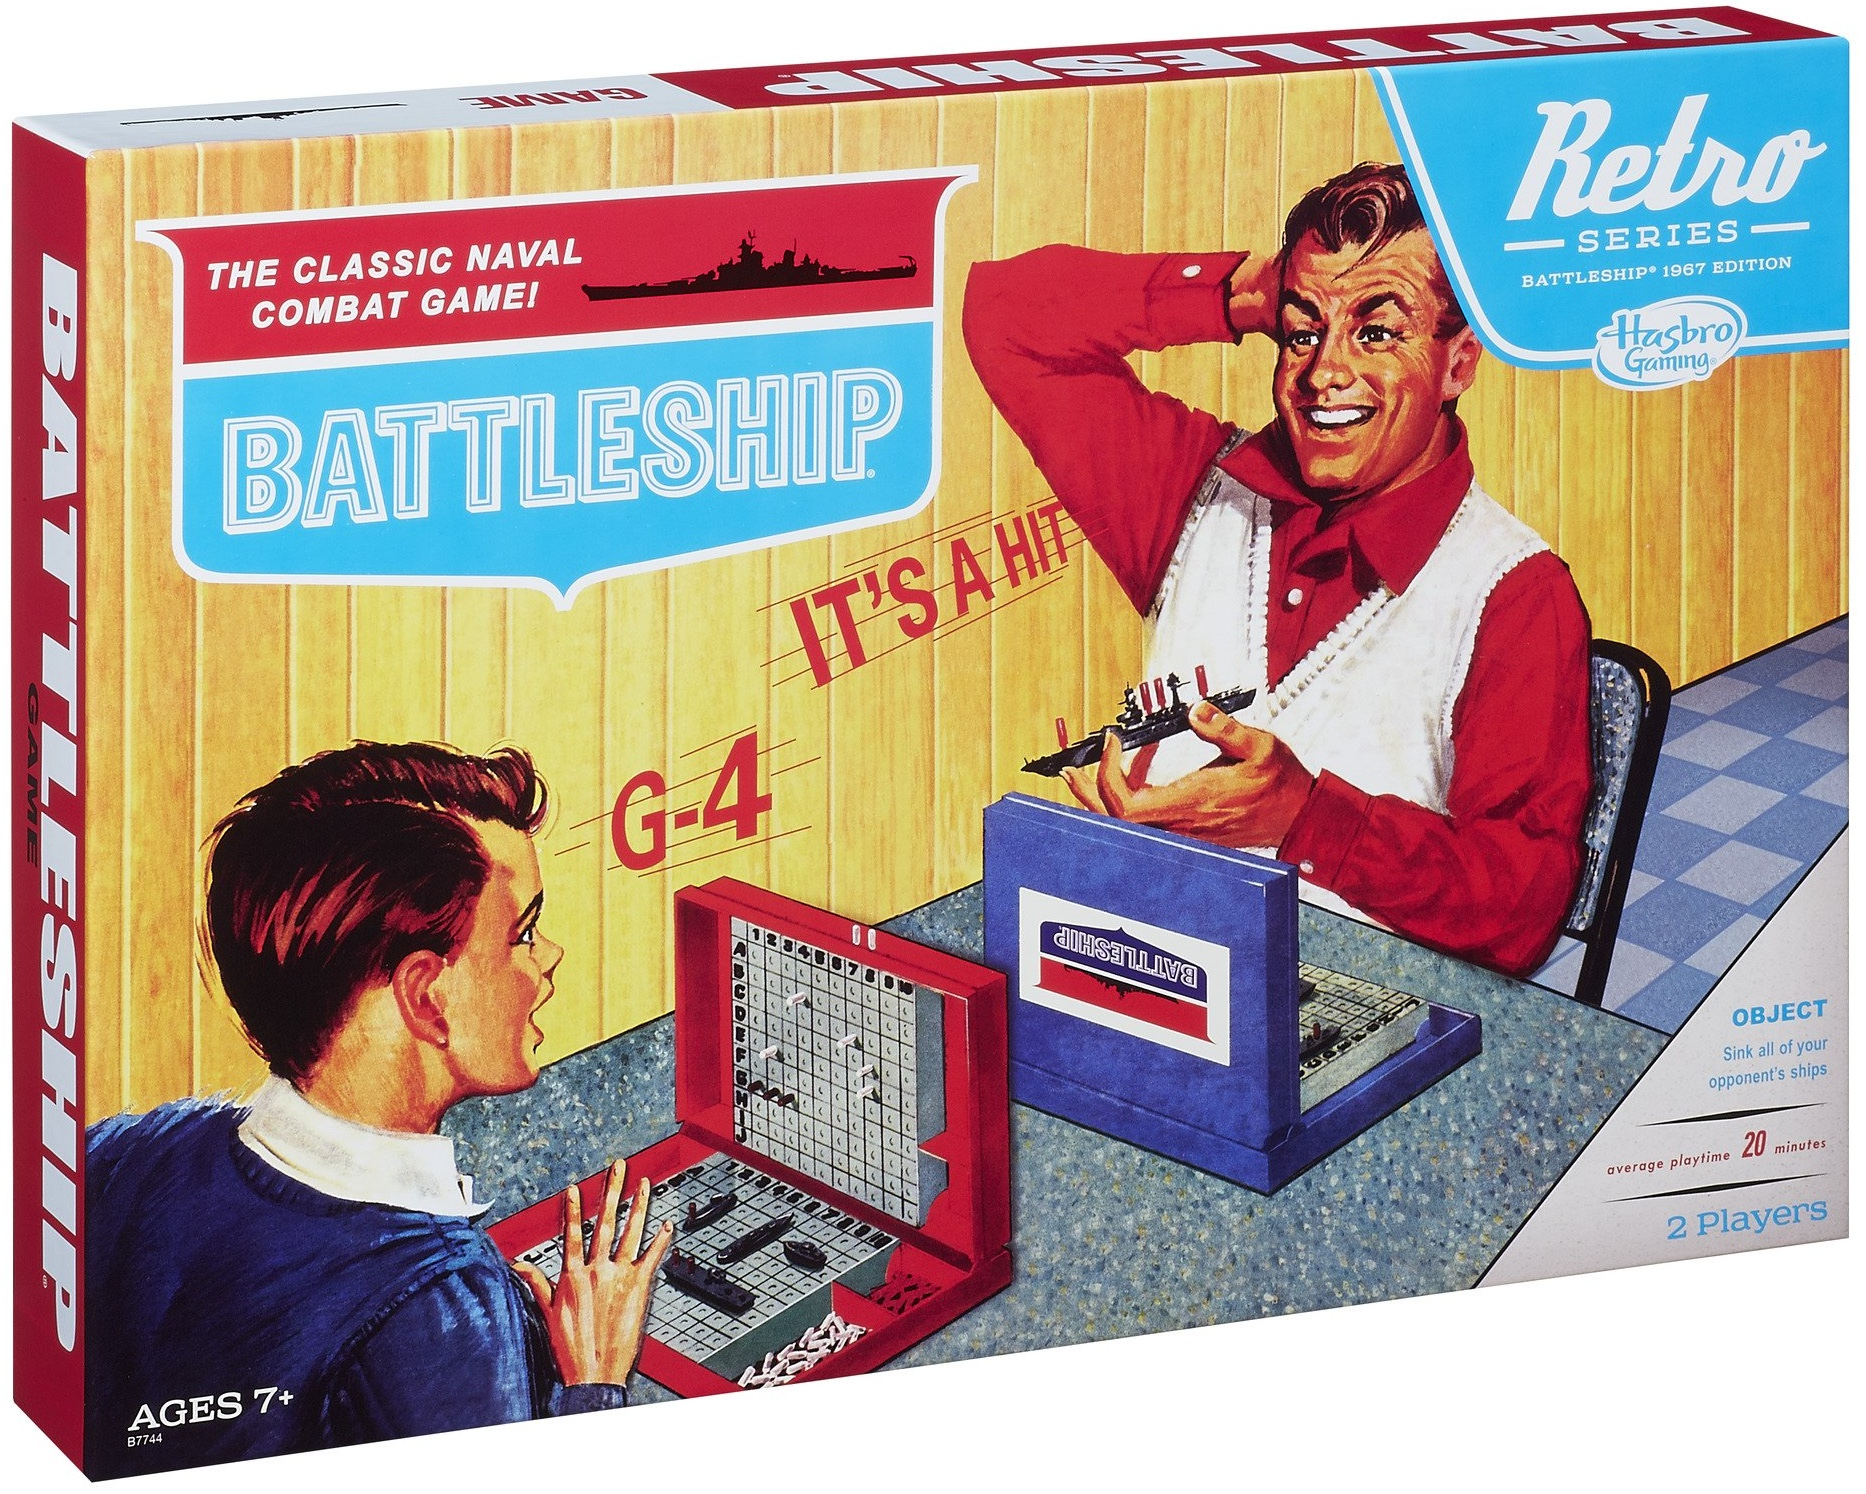<br><br>
Complete the program that allows you to play the game __[Battleship](https://en.wikipedia.org/wiki/Battleship_(game))__ against the computer.<br>

In this version, we will place the following ships: <br>
`1x Battleship (Size 5)`<br>
`2x Destroyer (Size 4)`<br>
`3x Cruiser (Size 3)`<br>
`4x Submarine (Size 2)`<br>

### Your Goals:

- Distribute the ships randomly on the playing field (horizontal & vertical) <br>
- Notify the player if a ship was sunk and mark the sunk ship on the playing field <br>
- [Optional] Output if there was a close miss of a ship <br>


The game is over when all ships have been sunk.

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf) #show all elements when using print

# Initialize variables

In [ ]:
size = 10

ship_length=[5,4,4,3,3,3,2,2,2,2] #as per instructions
name_ships=['Battleship', 'Destroyer', 'Destroyer', 'Cruiser',
            'Cruiser', 'Cruiser', 'Submarine', 'Submarine', 'Submarine', 'Submarine']

sea_output = np.full((size,size),'~',dtype=str) # for output of game
prev_hits=[]

# Place ships

In [ ]:
def ship_placement(sea, length_ship=1, number_ship=1):
    '''
    In a square playing field represented by the 2D array sea, a ship of length length_ship is placed randomly on empty fields by changing the corresponding entries in sea from 0 to
    number_ship.

    Parameters: 
    sea: 2D len(sea)xlen(sea) numpy array with integer entries, where 0 corresponds to an empty field
    length_ship=1: integer that corresponds to length of ship to be placed
    number_ship=1: integer that the entry in sea should be changed to when ship is placed on corresponding site

    Output:
    no direct output, make changes to sea directly (in-place)
    ''' 
    
                
        

In [ ]:
#Distribute ships randomly
sea=np.zeros((size,size), dtype=int) #initialize playing field
for i,l in enumerate(ship_length):        
    ship_placement(sea, l, i+1) #place number_ship i+1 of length_ship l on sea


In [ ]:
#Fixed playing field for testing
sea=np.array([[ 6 , 0 , 0 , 0 , 5 , 0 , 0 , 0 , 0 , 0],
              [ 6 , 0 , 0 , 0 , 5 , 0 , 0 , 0 , 0 , 0],
              [ 6 , 0 , 0 , 0 , 5 , 0 , 0 , 0 , 0 , 0],
              [ 0 , 0 , 8 , 8 , 0 , 0 ,10 , 0 , 0 , 0],
              [ 0 , 4 , 4 , 4 , 0 , 0 ,10 , 0 , 0 , 0],
              [ 0 , 0 , 0 , 0 , 0 , 0 , 2 , 2 , 2 , 2],
              [ 0 , 3 , 3 , 3 , 3 , 0 , 0 , 0 , 0 , 0],
              [ 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0],
              [ 0 , 0 , 7 , 7 , 0 , 0 , 0 , 0 , 0 , 9],
              [ 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 9]])

# The actual game

In [ ]:
#initialize while-loop
number_hits=0
tries=0 #counts tries
while np.any(sea): #check if sea contains numbers different from 0
    input_player=input('\n  Where do you suspect a ship? Input the coordinates x,y: ')
    x,y = [int(coord) for coord in input_player.split(',')] #transform input string into numbers for further processing
    if x >= size or y >= size:
        print("Coordinates not on playing field. Try again!")
        continue
    if (y,x) in prev_hits:
        print("You already explored this field. Try again!")
        continue
    else:
        prev_hits.append((y,x))
    tries+=1 #increase try-counter
    if sea[y,x]>0: 
        number_hits+=1     
        sea[y,x]=0 #delete entry in sea
        print('Hit!')
        sea_output[y,x] = 'X' #show hit on output battlefiled
    else:
        print('No hit!')
        sea_output[y,x] = 'O'
    print('After trying {0:d} time(s), you have scored {1:d} hit(s).'.format(tries, number_hits))
    print(sea_output)
else:  
    print('You won! You sunk all ships! You needed {0:d} tries.'.format(tries))
    print(f'Your hit rate was {number_hits/tries*100:.2f}%')
